In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from PIL import Image

In [9]:
# Loading images from path into proper data structure
# Set the directory path
imageDirectoryPath = 'D:/MyWorkspace/CameraTrapChallenge/CoherentSequenceIdentification/data/dama_dama_damhirsch_deer/dama_dama_damhirsch/dayvision'
# Get a list of all images in the path specified
imageItems = os.listdir(imageDirectoryPath)
imageList = []
for item in imageItems:
    # Check if the file is an image file
    if item.endswith(('.JPG', '.jpg')):
        # Read the image file using cv2.imread()
        image = cv2.imread(os.path.join(imageDirectoryPath, item))
        imageList.append(image)
print(f'Total number of image files loaded is: {len(imageList)}')

Total number of image files loaded is: 262


In [10]:
# MSE comparison
def mse(imageA, imageB, heightA, widthA):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(heightA*widthA)
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [11]:
coherentSeq = []
i, j = 0, 1
while i < len(imageItems):
    seq = []
    while j < len(imageItems):
        h = image.shape[0]
        w = image.shape[1]
        mseComparisonValue = mse(image[i], image[j], h, w)
        print(mseComparisonValue)
        if mseComparisonValue < 1:
            if imageItems[i] not in seq and imageItems[j] not in seq:
                seq.append(imageItems[i])
                seq.append(imageItems[j])
            i, j = i + 1, j + 1 
        else:
            break    
    if len(seq) > 0:    
        coherentSeq.append(seq) 
    i, j = i + 1, j + 1

print(coherentSeq)

0.0234832763671875
20.198107719421387
0.03138923645019531
5.171130180358887
0.026834487915039062
16.88298511505127
0.02607250213623047
7.378488540649414
0.02115154266357422
4.443352699279785
0.0225067138671875
7.808619499206543
0.027196884155273438
8.102484703063965
0.01765918731689453
8.223045349121094
0.023435592651367188
6.020914077758789
0.02839183807373047
7.9755401611328125
0.02549266815185547
7.836637496948242
0.025046348571777344
16.162519454956055
0.01601886749267578
3.2917137145996094
0.020834922790527344
22.802919387817383
0.017984390258789062
0.4860095977783203
0.016429901123046875
72.15724913279216
0.11533641815185547
0.1307551066080729
0.1476414998372396
0.14360523223876953
0.1459798812866211
0.13065210978190103
0.1174329121907552
0.0921796162923177
0.11057027180989583
0.1296383539835612
0.1452646255493164
0.14248275756835938
0.14452044169108072
0.1281423568725586
0.11629358927408855
0.09672737121582031
0.11216576894124348
0.12874984741210938
0.14664713541666666
0.1421136

In [12]:
coherentSequenceImage = []
i = 0
scalePercent = 50
for imageSegment in coherentSeq:
    addImages = []
    for imageFile in coherentSeq[i]:
        if imageFile.endswith(('.JPG', '.jpg')):
            image = cv2.imread(os.path.join(imageDirectoryPath, imageFile))
            width = int(image.shape[1] * scalePercent / 100)
            height = int(image.shape[0] * scalePercent / 100)
            dim = (width, height)
            resized = cv2.resize(image, dim, interpolation = cv2.INTER_NEAREST)
            addImages.append(resized)
    i+=1
    coherentSequenceImage.append(addImages)

In [13]:
# Output for the number of identified coherent sequences
print(f'The total number of sequences detected is {i}')

The total number of sequences detected is 16


The images in sequence 1


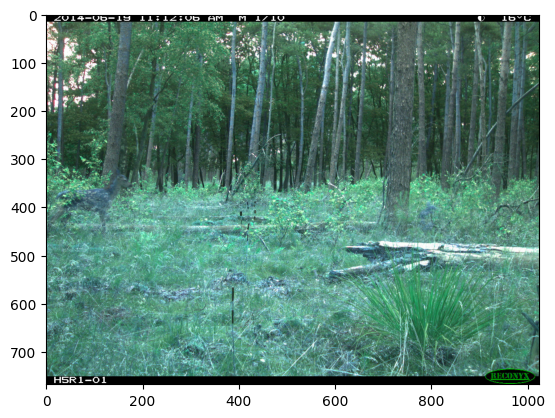

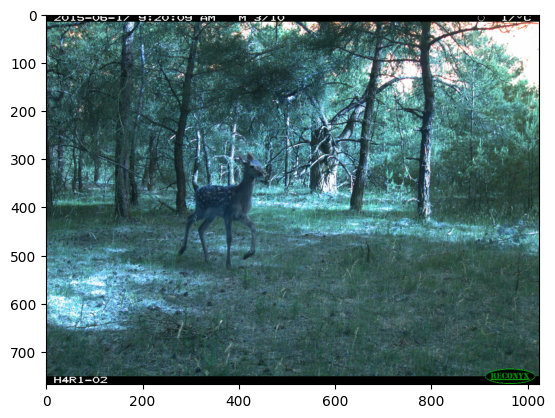

The images in sequence 2


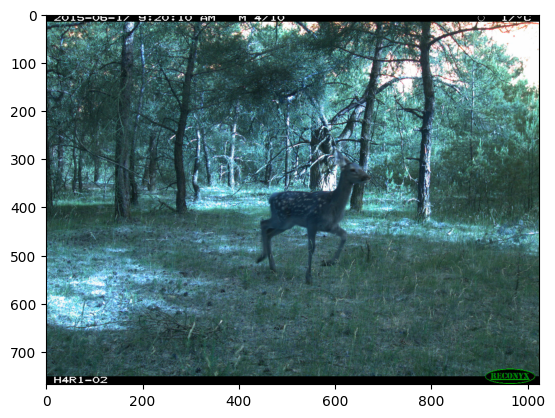

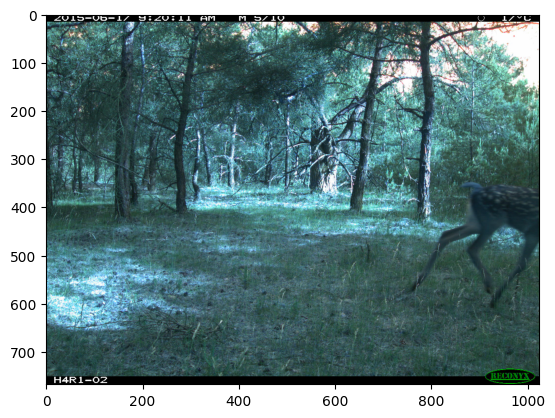

: 

In [14]:
# Printing the first 2 sequences to check

seqNum = 1
for sequence in coherentSequenceImage:
    if seqNum < 3:
        print(f'The images in sequence {seqNum}')
        for image in sequence:
            imgplot = plt.imshow(image)
            plt.show()
        seqNum += 1  
    else:
        break   